In [2]:
#基本套件和模組
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.sans-serif'] = ['DFKai-sb']
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('bili2.xlsx')
df.keys()

Index(['d', 'user9'], dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60041 entries, 0 to 60040
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   d       60015 non-null  object
 1   user9   60041 non-null  object
dtypes: object(2)
memory usage: 938.3+ KB


In [38]:
#觀察個人留言次數
size=df['user9'].value_counts()[:20]
size

女王永不过时        264
Heuchler-海    193
快急似我了         164
我爱神手          118
-熙听微风-        118
逆转方舟明日逐光      114
清欢Tihan       100
青草园子           88
赭鸽茗姿眉荏庸坝       84
某超电磁炮的上条当麻     75
世间事儿           74
怪物大大QAQ        68
玖修             63
一只幸运的罐头        56
吾眸蕴晚霞          55
小蟑敲笨蛋          54
小智zhi          52
我是不知道555       49
a22380134      48
不喜欢画工图         47
Name: user9, dtype: int64

In [40]:
size2=df['d'].value_counts()[:20]
size2

6                       7632
渡越命运的剑影                 2665
辉映未来的月光                 2437
离谱                      2104
改终焉                     1992
终焉归始                    1965
凯文必胜                     863
666                      749
凯文加油                     745
WBNREJP23GZF             731
回应我吧，爱莉希雅                628
赞                        579
妙啊                       500
爱门                       380
？                        318
有点东西                     287
66666666666666666666     279
66                       253
自我感动                     247
6666                     243
Name: d, dtype: int64

In [16]:
import jieba
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
with open('stop.text','r',encoding='utf-8') as f:
    stops= f.read()
stops=stops.split('\n')

In [18]:
#撰寫斷字程式
def preprocessor(s):
    return ' '.join(jieba.cut(s))

In [19]:
df['d']=df['d'].fillna(' ')

In [79]:
#主題探索(潛在狄式分配)
n_topics = 5
n_words = 5
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=n_topics)
cv = CountVectorizer(preprocessor=preprocessor,token_pattern='(?u)\\b\\w+\\b',stop_words=stops,max_df=0.5)
x_array =cv.fit_transform(df['d'])
x_topics=lda.fit_transform(x_array)
idx=cv.get_feature_names_out()
#查看第一篇主題
pd.DataFrame(lda.components_[0],index=idx,columns=['topic']).\
sort_values(by='topic',ascending=False)[:n_words]

,topic
终焉,2918.585325
回应,2009.199315
归始,2008.199915
爱莉,1741.199369
希雅,1588.199810


In [80]:
#展示5個主題
words={}
for topic in range(n_topics):
    word = pd.DataFrame(lda.components_[topic],index=idx).\
            sort_values(by=0,ascending=False)[:n_words].index.tolist()
    words[f'主題{topic+1}'] = word
pd.DataFrame(words)

,主題1,主題2,主題3,主題4,主題5
0,终焉,什么,命运,离谱,改终
1,回应,吗,剑影,凯文,始源
2,归始,还,渡越,加油,改始源
3,爱莉,码,未来,666,对
4,希雅,兑换,月光,乆,期待


In [109]:
#文字雲
#使用詞袋
cv = CountVectorizer(preprocessor=preprocessor,token_pattern='(?u)\\b\\w+\\b',stop_words=stops,max_df=0.5)
bow =cv.fit_transform(df['d'])
df_bow = pd.DataFrame(bow.toarray(),columns=cv.get_feature_names_out())

In [110]:
#查看最常見的十大關鍵字
df_bow.sum().sort_values(ascending=False)[:10]

改终    4323
凯文    3346
终焉    3152
命运    2830
剑影    2785
渡越    2767
未来    2699
月光    2611
辉映    2560
离谱    2153
dtype: int64

(-0.5, 799.5, 493.5, -0.5)

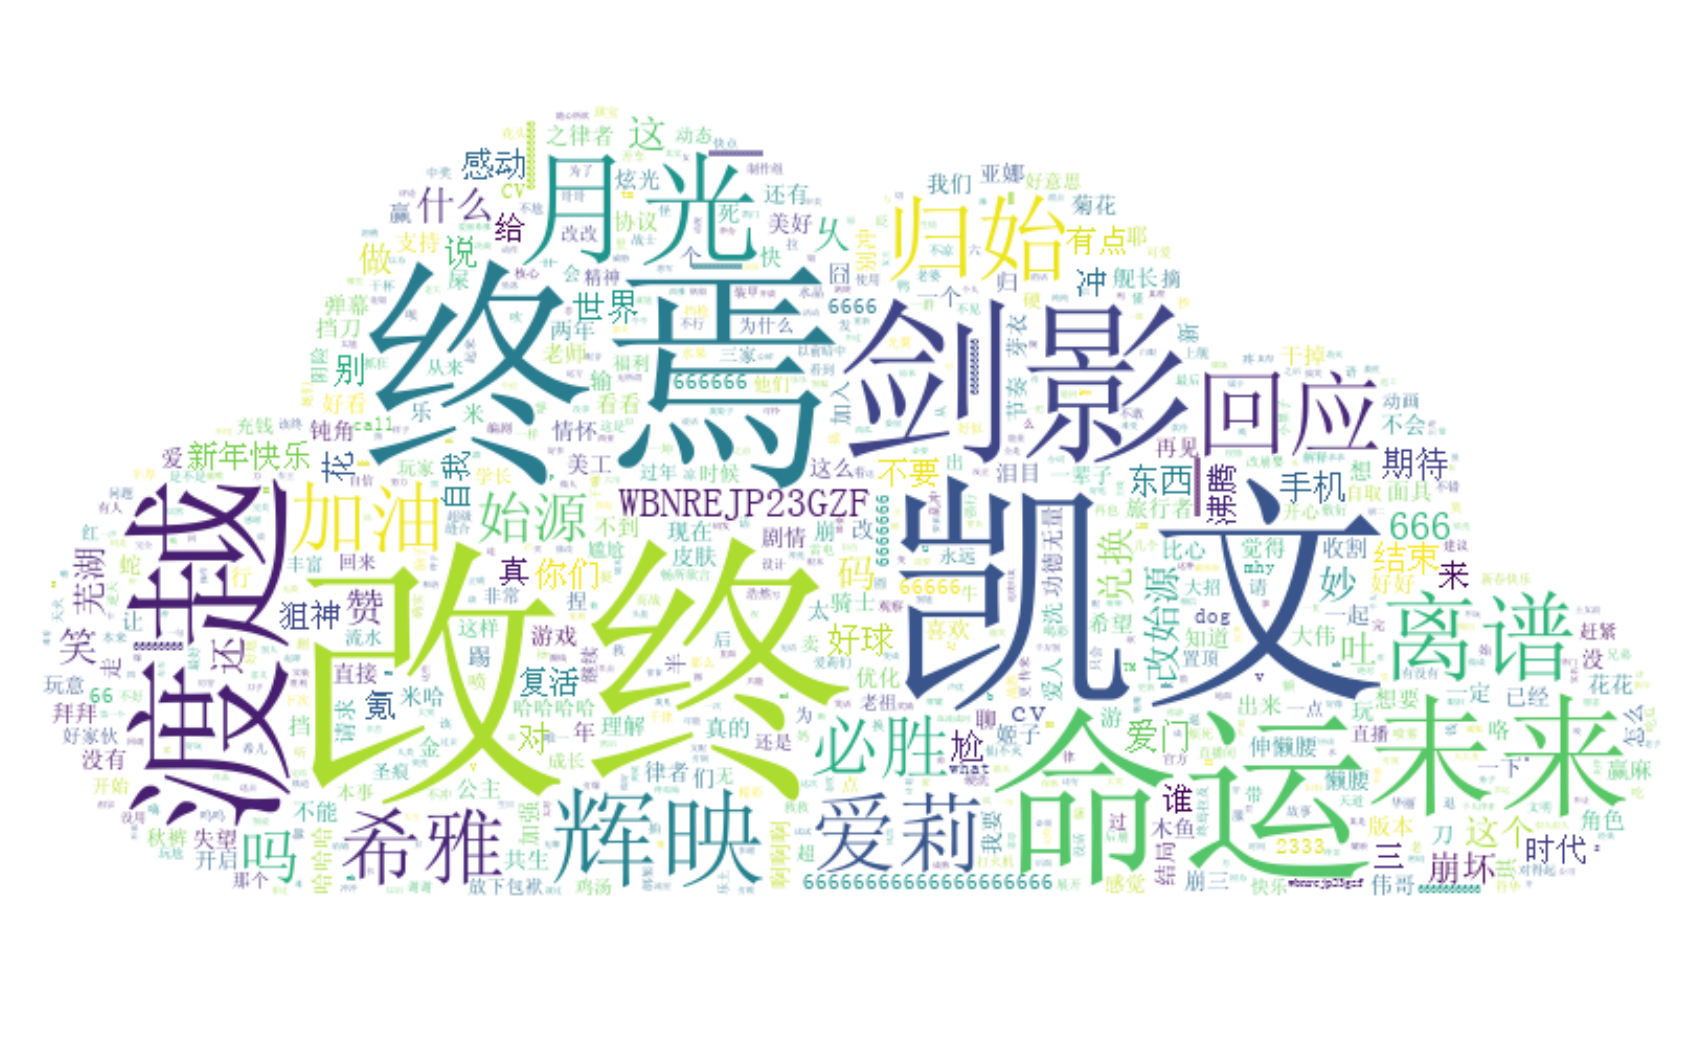

In [78]:
#繪製文字雲
import PIL
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from PIL import Image

alice_mask = np.array(Image.open('cloud_mask7.png'))
wc = WordCloud(background_color='white',max_words=2000,mask=alice_mask,font_path='simsun.ttf')
wc.generate_from_frequencies(df_bow.sum())
wc.to_file('cioud.png')

plt.figure(figsize=(15,15))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')

In [6]:
df1 = pd.read_excel('bili3.xlsx')
df1.keys()

Index(['sc', 'ts11', 'user12', 'price', 'time'], dtype='object')

In [14]:
size2=df1['sc'].value_counts()[:20]
size2

看看你自己发的视频再看现在没有自己理解一味追求所谓大众的理解就是脑子带点                  1
做的就是乐色，还不让说了？乐土之后越来越差，这两角色更是敷衍至极                      1
健蟑收收味，喜欢吃答辩没人管，别张嘴味太大了。也别按着别人吃。                       1
年轻时诋毁机枪哥，长大后支持机枪哥，成熟后成为机枪哥！大家一起，包～饺～砸（蚌友馅，不含脑花）！      1
没有美好能量了，要艹大伟才可以补充                                     1
回应我吧！雷电芽衣！                                            1
支持崩3                                                  1
玩家往往不知道自己要什么，但你们知道怎样做最合适后面没出的剧情，加油崩坏三!                1
队长能不能在表演一下那个，就是那个....回应我吧！爱莉希雅！                       1
你是懂致敬的，终焉那胯扭的和tnl有得一拼                                 1
这个6.3我一秒都呆不下去啦                                        1
你们桌上的水果是真的还是假的，可以吃吗                                   1
希望崩坏3有个美好的结局                                          1
崩坏3加油，越做越好！                                           1
米哈游，发自内心的说，很失望！                                       1
永远支持崩坏3！米哈游加油！                                        1
我是没木是昊京我玩这答辩游戏                                        1
大伟哥是我老婆！！！（不是）                                  

In [84]:
size3=df1['user12'].value_counts()[:20]
size3

人类高质量单推青鸽      6
神兽饕餮           4
不在の影           3
令狐林珍           3
问肯局长是不是基       2
来劈个叉           2
小鸟喵            2
某冰史莱姆          2
伊甸之风           2
希児の旦那          2
万王の柚眠          2
腥风血雨ky         2
饪饪             2
开天的上仙          2
Loid_Forger    2
AceLions       1
三千猪            1
Grimlock683    1
婆妈神orca        1
仓鼠开天           1
Name: user12, dtype: int64

In [85]:
size4=df1['price'].value_counts()[:20]
size4

30     95
100    22
50     21
500     3
Name: price, dtype: int64

In [96]:
df1.groupby('')['user12'].describe()[:5]

,count,unique,top,freq
price,,,,
30,95,80,人类高质量单推青鸽,6
50,21,19,神兽饕餮,2
100,22,22,骸子w,1
500,3,3,伊甸之风,1


In [98]:
#文字雲
#使用詞袋
cv = CountVectorizer(preprocessor=preprocessor,token_pattern='(?u)\\b\\w+\\b',stop_words=stops,max_df=0.5)
bow =cv.fit_transform(df1['sc'])
df_bow = pd.DataFrame(bow.toarray(),columns=cv.get_feature_names_out())

In [107]:
#查看最常見的十大關鍵字
df_bow.sum().sort_values(ascending=False)[:10]

答辩    28
做     19
终焉    15
崩坏    15
吗     13
什么    13
你们    13
希望    12
喜欢    12
米哈    11
dtype: int64

(-0.5, 799.5, 493.5, -0.5)

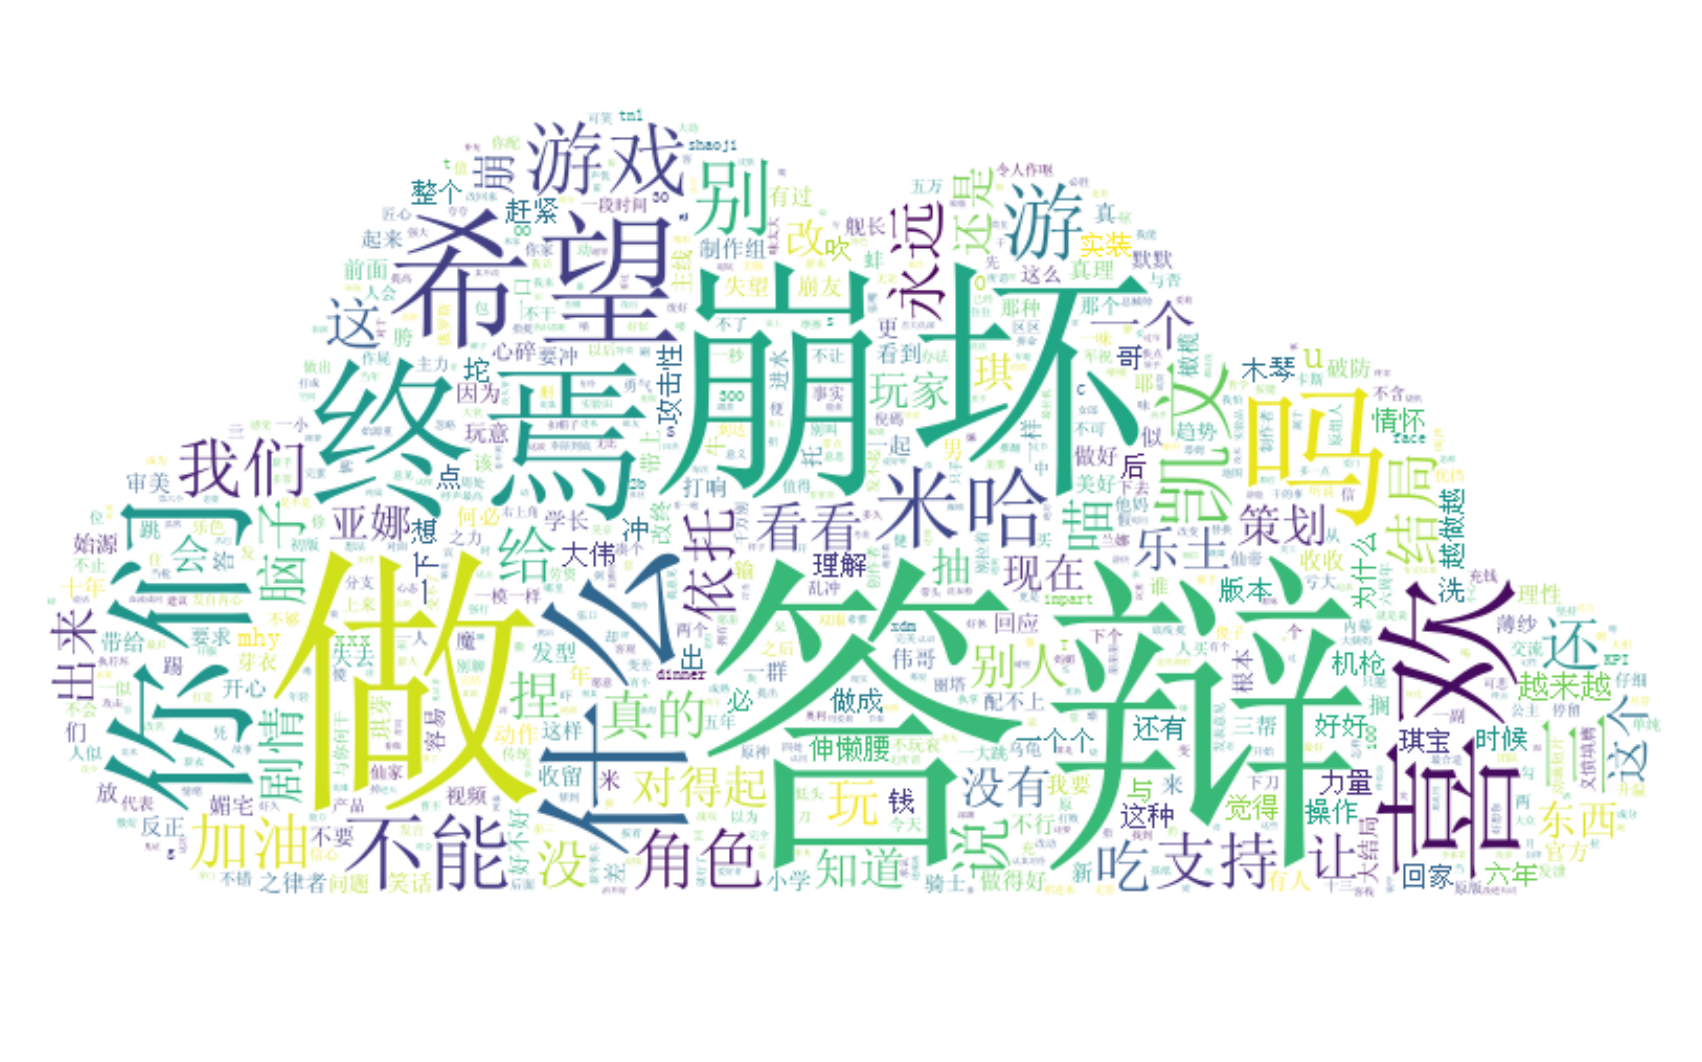

In [100]:
alice_mask = np.array(Image.open('cloud_mask7.png'))
wc = WordCloud(background_color='white',max_words=2000,mask=alice_mask,font_path='simsun.ttf')
wc.generate_from_frequencies(df_bow.sum())
wc.to_file('cioud.png')

plt.figure(figsize=(15,15))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')

In [105]:
n_topics = 3
n_words = 5
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=n_topics)
cv = CountVectorizer(preprocessor=preprocessor,token_pattern='(?u)\\b\\w+\\b',stop_words=stops,max_df=0.5)
x_array =cv.fit_transform(df1['sc'])
x_topics=lda.fit_transform(x_array)
idx=cv.get_feature_names_out()
#查看第一篇主題
pd.DataFrame(lda.components_[0],index=idx,columns=['topic']).\
sort_values(by='topic',ascending=False)[:n_words]

,topic
答辩,21.443360
吗,13.280451
什么,8.353286
做,8.299280
你们,7.540825


In [106]:
#展示5個主題
words={}
for topic in range(n_topics):
    word = pd.DataFrame(lda.components_[topic],index=idx).\
            sort_values(by=0,ascending=False)[:n_words].index.tolist()
    words[f'主題{topic+1}'] = word
pd.DataFrame(words)

,主題1,主題2,主題3
0,答辩,喜欢,崩坏
1,吗,做,终焉
2,什么,捏,答辩
3,做,游,永远
4,你们,你们,做


In [1]:
pip install snownlp

  Created wheel for snownlp: filename=snownlp-0.12.3-py3-none-any.whl size=37760963 sha256=77751319d474abf871b6ff38f885996cfd3287f0ca8b072b0d2d7e7f2b9b0105
  Stored in directory: c:\users\docto\appdata\local\pip\cache\wheels\64\3a\d2\0572cf9eb7022ac27ca0abc27ad4b37020fc26b111466d0438
Successfully built snownlp
Note: you may need to restart the kernel to use updated packages.


In [21]:
from snownlp import SnowNLP
from snownlp import sentiment
l = df1['sc']
sl = SnowNLP(l)
print(s.sentiments)
print(s.keywords(3))
print(s.summary(3))

0.4410363212891094
['钱', '充']
['我们充的是自己的钱', '别什么都冲']


In [54]:
from snownlp import SnowNLP
from snownlp import sentiment
import re
x = df['d']
x1 = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          "  ",          # Replace all non-letters with spaces
                          str(x))
s = SnowNLP(x1)
print(s.sentiments)
print(s.keywords(3))
print(s.summary(3))

0.2619295992013928
['d', 'Length', 'Name']
['v                                                                                                                                                                                                                                                                                                                      Name    d    Length                  dtype    object']
